In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer

#sns.set_style("darkgrid")

2 Plot distribution of the instances in each class and save the graphic in a file

In [86]:
numOffolds = len(os.listdir('BBC/'))
print(numOffolds)
all_folds = os.listdir('BBC/')
folder_path = all_folds[0]
print(folder_path)

len([x for x in os.listdir('BBC/'+folder_path)])


5
business


510

In [87]:
data_need = []
data_x = []
data_y = []


path = 'BBC/'
all_folds = os.listdir(path)

for i in range (len(all_folds)):
    data_x.append(all_folds[i])
    print(f'comput No.{i+1} folder.')
    folder_path = all_folds[i]
    NumOfFiles = len([x for x in os.listdir(path + folder_path)])
    data_y.append(NumOfFiles)
    print(f'No.{i+1} has {NumOfFiles} files.')
    table = pd.DataFrame({'folder_id': all_folds[i],'file_num':[NumOfFiles]})
    data_need.append(table)

        

comput No.1 folder.
No.1 has 510 files.
comput No.2 folder.
No.2 has 386 files.
comput No.3 folder.
No.3 has 417 files.
comput No.4 folder.
No.4 has 511 files.
comput No.5 folder.
No.5 has 401 files.


In [88]:
data_final = pd.concat(data_need, axis=0)
print(data_final)

       folder_id  file_num
0       business       510
0  entertainment       386
0       politics       417
0          sport       511
0           tech       401


['business' 'entertainment' 'politics' 'sport' 'tech']
[510 386 417 511 401]


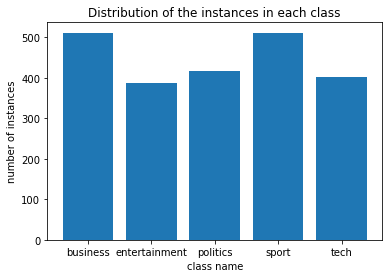

In [89]:
x_np = np.array(data_x)
print(x_np)
y_np = np.array(data_y)
print(y_np)
plt.title("Distribution of the instances in each class")
plt.xlabel("class name")
plt.ylabel("number of instances")
plt.bar(x_np,y_np)
plt.savefig('BBC-Distribution.pdf')
plt.show()

In [90]:
# use load_files to read the file structure and assign the category name to each file
corpus_data = load_files("BBC",encoding="latin1")
corpus_data_data = corpus_data.data
# print(corpus_data_data)
corpus_category = corpus_data.target
print(corpus_category)
corpus_category_names = corpus_data.target_names
print(corpus_category_names)


 


[0 4 2 ... 1 1 3]
['business', 'entertainment', 'politics', 'sport', 'tech']


4 Pre-process the dataset to have the features ready to be used

In [91]:
#create a Vectorizer Object
vectorizer = CountVectorizer()
#tokenize and build vocab
vectorizer.fit(corpus_data_data)
#summarize
vocabulary_corpus = vectorizer.get_feature_names()
# print(vocabulary_corpus)
print(len(vectorizer.get_feature_names()))


# Encode the dataset to document-term matrix
vector = vectorizer.transform(corpus_data_data)
print(vector.shape)
print(vector.toarray().sum())


29421
(2225, 29421)
836357


In [92]:
texts=["dog cat fish","dog cat cat","fish bird", 'bird']
cv = CountVectorizer()
cv_fit=cv.fit_transform(texts)

print(cv.get_feature_names())
print(cv_fit.toarray())
print(cv_fit.toarray().sum())

['bird', 'cat', 'dog', 'fish']
[[0 1 1 1]
 [0 2 1 0]
 [1 0 0 1]
 [1 0 0 0]]
9


5 Split the dataset int 80% for training 20% for testing

In [93]:
# split the dataset into 80% for training and 20% for testing
X = corpus_data_data
y = corpus_category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state= None)
# print(X_train)
# print(y_train)




In [94]:
# countVectorizer
vec = CountVectorizer()
# fit the vectorizer on the training dataset
vec.fit(X_train)
print(len(vec.get_feature_names()))
vocab = vec.get_feature_names()
# print(vocab)
X_train_transformed = vec.transform(X_train)
# print(X_train_transformed)
# convert training set to document-term matrix
X_train_feat = X_train_transformed.toarray()
# convert to sparse matrix for readability
pd.DataFrame(X_train_feat,columns= [vec.get_feature_names()])



26878


,00,000,000bn,000m,000s,000th,001,001and,001st,004,...,zoom,zooms,zooropa,zornotza,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
# for test data
X_test_transformed = vec.transform(X_test)
# X_test_transformed
# print(X_test_transformed)
# convert testing set to document-term matrix
X_test_feat = X_test_transformed.toarray()
# convert to sparse matrix for readability
pd.DataFrame(X_test_feat, columns= [vec.get_feature_names()])


,00,000,000bn,000m,000s,000th,001,001and,001st,004,...,zoom,zooms,zooropa,zornotza,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
442,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


6 train a multinomial Naive Bayes Classifier on the training set using the default parameters and evaluate it on the test set

In [96]:
f=open('bbc-performance.txt','w')

In [97]:
# multinomial Naive Bayes
print("--------------------------------MultinomialNB default values, try 1-----------------------------------",file=f)
nb = MultinomialNB(alpha=1)
# fit the training set using the default parameters and evaluate it on the test set
nb.fit(X_train_transformed, y_train)

# predict, Perform classification on an array of test vectors X.
y_pred_class = nb.predict(X_test_transformed)
# predict probabilities, Return probability estimates for the test vector X.
y_pred_proba = nb.predict_proba(X_test_transformed)

# b) confusion matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print("(b) the confusion matrix: ", file=f)
print(confusion, file=f)



# c) the precision, recall and F1-measure for each class
print("(c) the precision, recall and F1-measure for each class of the test set : ", file=f)
print(metrics.classification_report(y_test, y_pred_class), file=f)



# d) the accuracy, macro-average F1 and weighted-average F1 of the model

accuracy = metrics.accuracy_score(y_test, y_pred_class)
print("(d) the accuracy, macro-average F1 and weighted-average F1 of the model: ", file=f)
print("Accuracy score of the test set is : " + str(accuracy),file=f)

macro_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='macro')
print("Macro average F1 of the test set is : " + str(macro_avg_F1),file=f)
weighted_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='weighted')
print("Weighted average F1 of the test set is : " + str(weighted_avg_F1),file=f)

# index = nb.predict(vec.transform(['Need to restart economy but with caution: Yogi Adityanath at E-Agenda AajTak']))

# def type_check(i):
#     if i == 0:
#         print('business')
#     elif i == 1:
#         print('entertainment')
#     elif i == 2:
#         print('politics')
#     elif i == 3:
#         print('sport')
#     elif i == 4:
#         print('tech')
# type_check(index)

In [98]:
# e) the prior probability of each class
print("(e) the prior probability of each class : ",file=f)

sum = np.sum(y_np)
print(sum)
index = 0
for i in x_np:
    prior = y_np[index]/sum
    index = index + 1
    print(i + ': ' + str(prior), file=f)



2225


In [99]:
# f) the size of the vocabulary(the number of different words)
print("(f) the size of the vocabulary(the number of different words",file=f)
print(len(vocabulary_corpus),file=f)

In [100]:
# g) the number of word-tokens in each class
print("(g) the number of word-tokens in each class: ",file=f)
for class_name in corpus_category_names:
    # print(class_name)
    class_data = load_files("BBC", categories=class_name, encoding='latin1')
    class_data_data = class_data.data
    class_vec = CountVectorizer()
    class_array = class_vec.fit_transform(class_data_data).toarray()
    sum_class = class_array.sum()

    
    print("The number of word-tokens in " + class_name + ": " + str(sum_class),file=f)
    


In [101]:
# h) the number of word-tokens in the entire corpus
print('(h) the number of word-tokens in the entire corpus: ',file=f)
sum_total = vector.toarray().sum() 
print("Total word-tokens in entire corpus: " + str(sum_total),file=f)

# j) the number and percentage of words with a frequency of 1 in the entire corpus
print('(j) the number and percentage of words with a frequency of 1 in the entire corpus: ',file=f)
count_word = 0
for word in (vector.toarray().sum(axis = 0)):
    if word == 1:
        count_word = count_word + 1
print("The number of words with a frequency of 1 in entire corpus: " + str(count_word),file=f)
print("The percentage of words with a frequency of 1 in entire corpus: " + str(count_word/sum_total),file=f)

In [102]:
# i) the number and percentage of words with freuency of zero in each class
print('(i) the number and percentage of words with freuency of zero in each class: ',file=f)
for class_name in corpus_category_names:
    # print(class_name)
    class_data = load_files("BBC", categories=class_name, encoding='latin1')
    class_data_data = class_data.data
    class_vec = CountVectorizer()
    class_vec.fit(class_data_data)
    num_feat_word = len(class_vec.get_feature_names())
    num_zero = len(vocabulary_corpus)-num_feat_word
    print("The number of words with frequency of zero in " + class_name + ": "+ str(num_zero),file=f)  # frequency , which divide which
    print("The percentage of words with frequency of zero in " + class_name + ": "+ str(num_zero/len(vocabulary_corpus)),file=f)


In [103]:

counts = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names())
print("(k) 2 favoirite words and their log-prob",file=f)
# counts
# show the top 10 most common words
# print(counts.T.sort_values(by=0, ascending=False).head(10))
import math
count_love = counts['love'].sum()
print("frequency of 'love': " + str(count_love),file=f)
log_prob_love = math.log(count_love/sum_total)
print("the log-prob of the 'love' favorite word is: " + str(log_prob_love),file=f)
count_key = counts['key'].sum()
print("frequency of 'key': " + str(count_key),file=f)
log_prob_key = math.log(count_key/sum_total)
print("the log-prob of the 'key' favorite word is: " + str(log_prob_key),file=f)


10. Redo steps 6 and 7, but this time change the smooth value to 0.9. Appendthe results at the end of bbc-performance.tx

In [104]:
# multinomial Naive Bayes

print("--------------------------------MultinomialNB smooth valve to 0.9-----------------------------------",file=f)
nb = MultinomialNB(alpha=0.9)
# fit the training set using the default parameters and evaluate it on the test set
nb.fit(X_train_transformed, y_train)

# predict, Perform classification on an array of test vectors X.
y_pred_class = nb.predict(X_test_transformed)
# predict probabilities, Return probability estimates for the test vector X.
y_pred_proba = nb.predict_proba(X_test_transformed)

# b) confusion matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print("(b) the confusion matrix: ", file=f)
print(confusion, file=f)



# c) the precision, recall and F1-measure for each class
print("(c) the precision, recall and F1-measure for each class of the test set : ",file=f)
print(metrics.classification_report(y_test, y_pred_class),file=f)



# d) the accuracy, macro-average F1 and weighted-average F1 of the model

accuracy = metrics.accuracy_score(y_test, y_pred_class)
print("(d) the accuracy, macro-average F1 and weighted-average F1 of the model: ",file=f)
print("Accuracy score of the test set is : " + str(accuracy),file=f)

macro_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='macro')
print("Macro average F1 of the test set is : " + str(macro_avg_F1),file=f)
weighted_avg_F1 = metrics.f1_score(y_test, y_pred_class, average='weighted')
print("Weighted average F1 of the test set is : " + str(weighted_avg_F1),file=f)
# e) the prior probability of each class
print("(e) the prior probability of each class : ",file=f)

sum = np.sum(y_np)
print(sum)
index = 0
for i in x_np:
    prior = y_np[index]/sum
    index = index + 1
    print(i + ': ' + str(prior), file=f)

# f) the size of the vocabulary(the number of different words)
print("(f) the size of the vocabulary(the number of different words",file=f)
print(len(vocabulary_corpus),file=f)
# g) the number of word-tokens in each class
print("(g) the number of word-tokens in each class: ",file=f)
for class_name in corpus_category_names:
    # print(class_name)
    class_data = load_files("BBC", categories=class_name, encoding='latin1')
    class_data_data = class_data.data
    class_vec = CountVectorizer()
    class_array = class_vec.fit_transform(class_data_data).toarray()
    sum_class = class_array.sum()

    
    print("The number of word-tokens in " + class_name + ": " + str(sum_class),file=f)
    
# h) the number of word-tokens in the entire corpus
print('(h) the number of word-tokens in the entire corpus: ',file=f)
sum_total = vector.toarray().sum() 
print("Total word-tokens in entire corpus: " + str(sum_total),file=f)

# i) the number and percentage of words with freuency of zero in each class
print('(i) the number and percentage of words with freuency of zero in each class: ',file=f)
for class_name in corpus_category_names:
    # print(class_name)
    class_data = load_files("BBC", categories=class_name, encoding='latin1')
    class_data_data = class_data.data
    class_vec = CountVectorizer()
    class_vec.fit(class_data_data)
    num_feat_word = len(class_vec.get_feature_names())
    num_zero = len(vocabulary_corpus)-num_feat_word
    print("The number of words with frequency of zero in " + class_name + ": "+ str(num_zero),file=f)  # frequency , which divide which
    print("The percentage of words with frequency of zero in " + class_name + ": "+ str(num_zero/len(vocabulary_corpus)),file=f)

# j) the number and percentage of words with a frequency of 1 in the entire corpus
print('(j) the number and percentage of words with a frequency of 1 in the entire corpus: ',file=f)
count_word = 0
for word in (vector.toarray().sum(axis = 0)):
    if word == 1:
        count_word = count_word + 1
print("The number of words with a frequency of 1 in entire corpus: " + str(count_word),file=f)
print("The percentage of words with a frequency of 1 in entire corpus: " + str(count_word/sum_total),file=f)


counts = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names())
print("(k) 2 favoirite words and their log-prob",file=f)
# counts
# show the top 10 most common words
# print(counts.T.sort_values(by=0, ascending=False).head(10))
import math
count_love = counts['love'].sum()
print("frequency of 'love': " + str(count_love),file=f)
log_prob_love = math.log(count_love/sum_total)
print("the log-prob of the 'love' favorite word is: " + str(log_prob_love),file=f)
count_key = counts['key'].sum()
print("frequency of 'key': " + str(count_key),file=f)
log_prob_key = math.log(count_key/sum_total)
print("the log-prob of the 'key' favorite word is: " + str(log_prob_key),file=f)


2225
